In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import os
from datetime import datetime
from MCForecastTools import MCSimulation
import requests
import pandas_datareader as pdr
%matplotlib inline

In [2]:
# Function to Validate Tickers
def validateTick(tick):
    
    # Try Inputting into Yahoo Stocks
    try:
        pdr.DataReader(f'{tick}','yahoo',date)
    
    # Raise Error if Invalid
    except:
        raise ValueError("Ticker Not Valid.")
        
# Function to Validate Date
def validate(date_text):
    
    # Try Check on Format
    try:
        datetime.strptime(date_text, '%Y-%m-%d')
        
    # Raise Error if Invalid
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")

In [3]:
# Set Empty Dictionary
stock_dict = {}

# Set Empty List
stock_list = []

# Pick a Start Date
date = input("Pick a start date for your analysis (YYYY-MM-DD): ")
validate(date)

# While Loop to Pick Stocks
while (True):
    name = input("Add a stock ticker to the list: ").upper()
    validateTick(name)
    stock_dict[name] = date
    stock_list.append(name)
    cont = input("Press 'y' to Add Another Stock, press 'Enter' to exit")
    if cont == "":
        break;

Pick a start date for your analysis (YYYY-MM-DD):  2015-01-01
Add a stock ticker to the list:  TSLA
Press 'y' to Add Another Stock, press 'Enter' to exit y
Add a stock ticker to the list:  MSFT
Press 'y' to Add Another Stock, press 'Enter' to exit y
Add a stock ticker to the list:  AMD
Press 'y' to Add Another Stock, press 'Enter' to exit 


In [4]:
def stockCreation(stock_dict, stock_list):
    func_list = []
    count = 0
    for key, value in stock_dict.items():
        globals()[key] = pdr.DataReader(f'{key}','yahoo',value)
        globals()[key].columns = [[key, key, key, key, key, key,],["high", "low", "open", "close", "volume", "adj_close"]]
        func_list.append(globals()[key])
    
    portfolio = func_list[0]
    
    if len(func_list) == 2:
        portfolio = portfolio.merge(func_list[1], left_index=True, right_index=True, suffixes=[f'_{stock_list[0]}', f'_{stock_list[1]}'])
    elif len(func_list) > 2:
        portfolio = portfolio.merge(func_list[1], left_index=True, right_index=True)
        for x in range(len(func_list)-2):
            portfolio = portfolio.merge(func_list[x + 2], left_index=True, right_index=True)

    portfolio_close = []       
    for x in range(len(stock_list)):
        portfolio_close.append(portfolio[stock_list[x]][f"adj_close"])
    
    portfolio_close = pd.DataFrame(portfolio_close)
    
    portfolio_close = portfolio_close.T
    
    portfolio_close.columns = stock_list
        
        
    
    return portfolio, portfolio_close

In [5]:
portfolio = stockCreation(stock_dict, stock_list)[0]
portfolio

TSLA                                                  \
                  high         low        open       close      volume   
Date                                                                     
2015-01-02   44.650002   42.652000   44.574001   43.862000  23822000.0   
2015-01-05   43.299999   41.431999   42.910000   42.018002  26842500.0   
2015-01-06   42.840000   40.841999   42.012001   42.256001  31309500.0   
2015-01-07   42.956001   41.956001   42.669998   42.189999  14842000.0   
2015-01-08   42.759998   42.001999   42.562000   42.124001  17212500.0   
...                ...         ...         ...         ...         ...   
2020-12-07  648.789978  603.049988  604.919983  641.760010  56309700.0   
2020-12-08  651.280029  618.500000  625.510010  649.880005  64265000.0   
2020-12-09  654.320007  588.000000  653.690002  604.479980  71291200.0   
2020-12-10  627.750000  566.340027  574.369995  627.070007  67083200.0   
2020-12-11  624.000000  596.799988  615.010010  609.989990  46359600.0   

                              MSFT                                      \
             adj_close        high         low        open       close   
Date                                                                     
2015-01-02   43.862000   47.419998   46.540001   46.660000   46.759998   
2015-01-05   42.018002   46.730000   46.250000   46.369999   46.330002   
2015-01-06   42.256001   46.750000   45.540001   46.380001   45.650002   
2015-01-07   42.189999   46.459999   45.490002   45.980000   46.230000   
2015-01-08   42.124001   47.750000   46.720001   46.750000   47.590000   
...                ...         ...         ...         ...         ...   
2020-12-07  641.760010  215.539993  212.990005  214.369995  214.289993   
2020-12-08  649.880005  216.949997  212.889999  213.970001  216.009995   
2020-12-09  604.479980  215.229996  211.210007  215.160004  211.800003   
2020-12-10  627.070007  213.080002  210.360001  211.770004  210.520004   
2020-12-11  609.989990  213.320007  209.110001  210.050003  213.259995   

                                          AMD                        \
                volume   adj_close       high        low       open   
Date                                                                  
2015-01-02  27913900.0   41.539135   2.670000   2.670000   2.670000   
2015-01-05  39673900.0   41.157158   2.700000   2.640000   2.670000   
2015-01-06  36447900.0   40.553074   2.660000   2.550000   2.650000   
2015-01-07  29114100.0   41.068310   2.650000   2.540000   2.630000   
2015-01-08  29645200.0   42.276463   2.650000   2.560000   2.590000   
...                ...         ...        ...        ...        ...   
2020-12-07  24620000.0  214.289993  95.000000  92.970001  94.949997   
2020-12-08  23284100.0  216.009995  94.739998  91.900002  94.050003   
2020-12-09  32440600.0  211.800003  94.699997  89.160004  92.760002   
2020-12-10  26733300.0  210.520004  92.089996  89.029999  89.550003   
2020-12-11  30972600.0  213.259995  92.330002  90.160004  91.540001   

                                            
                close    volume  adj_close  
Date                                        
2015-01-02   2.670000         0   2.670000  
2015-01-05   2.660000   8878200   2.660000  
2015-01-06   2.630000  13912500   2.630000  
2015-01-07   2.580000  12377600   2.580000  
2015-01-08   2.610000  11136600   2.610000  
...               ...       ...        ...  
2020-12-07  94.070000  39815700  94.070000  
2020-12-08  92.919998  33907500  92.919998  
2020-12-09  89.830002  52170400  89.830002  
2020-12-10  91.660004  33804400  91.660004  
2020-12-11  91.650002  28343000  91.650002  

[1498 rows x 18 columns]

In [6]:
portfolio_close = stockCreation(stock_dict, stock_list)[1]
portfolio_close

,TSLA,MSFT,AMD
Date,,,
2015-01-02,43.862000,41.539135,2.670000
2015-01-05,42.018002,41.157158,2.660000
2015-01-06,42.256001,40.553074,2.630000
2015-01-07,42.189999,41.068310,2.580000
2015-01-08,42.124001,42.276463,2.610000
...,...,...,...
2020-12-07,641.760010,214.289993,94.070000
2020-12-08,649.880005,216.009995,92.919998
2020-12-09,604.479980,211.800003,89.830002


# Monte Carlo Simulation

### Definition: Computational algorithms that rely on repeated random sampling to obtain numerical results. 

### Purpose: The underlying concept is to use randomness to solve problems that might be deterministic in principle.

In [7]:
# Select Number of Years for Monte Carlo Simulation
num_years = int(input("How many years do you want to run the Monte Carlo Simulation for?"))

# Select Number of Simulations for Monte Carlo Simulation
sims = int(input("How many simulations would you like to run?"))

# Create Monte Carlo Object
MC = MCSimulation(
        portfolio_data = portfolio,
        weights = np.full((1,len(portfolio_close.columns)), 1/len(portfolio_close.columns))[0].tolist(),
        num_simulation = sims,
        num_trading_days = 252*num_years
    )

# Run Monte Carlo Simulation
cumu_return = MC.calc_cumulative_return()

How many years do you want to run the Monte Carlo Simulation for? 10
How many simulations would you like to run? 250


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

### Each line represents one simulation of possible outcomes of this portfolio.

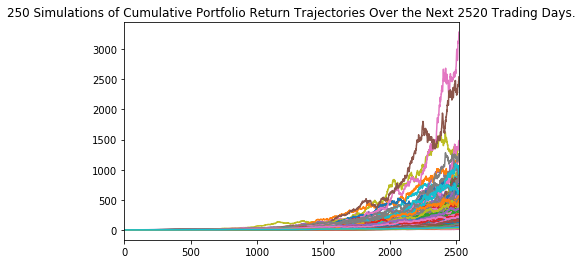

In [8]:
# Create Plot Simulation
line_plot = MC.plot_simulation();

# Save Plot Simulation
line_plot.figure.savefig(f"Images/MC_plot_simulation.png", bbox_inches='tight')

### Before moving on: Is a high volatile or low volatile outcome more likely?
 
### This graph represents the distribution of returns across all the simulations.

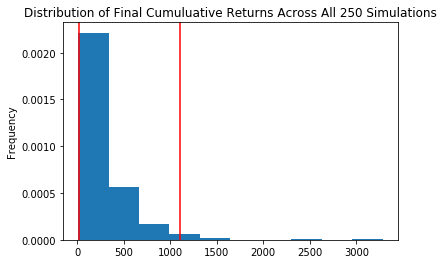

In [9]:
# Create Plot Distribution
plot_dist = MC.plot_distribution();

# Save Plot Distribution
plot_dist.figure.savefig(f"Images/MC_plot_distribution.png", bbox_inches='tight')

### This graph shows a low volatile outcome is more likely.

In [10]:
# Create Cumulative Return Table
tbl = MC.summarize_cumulative_return()

# Select Initial Investment
initial_investment = int(input("Input the amount of money you'd like to forecast in this analysis: $"))

# Set Lower Confidence Interval
ci_lower = round(tbl[8]*initial_investment,2)

# Set Upper Confidence Interval
ci_upper = round(tbl[9]*initial_investment,2)

# Print Results
print(f"""

There is a 95% chance that an initial investment of ${initial_investment} in the portfolio
over the next {num_years} years will end within in the range of ${ci_lower} and ${ci_upper}""")

Input the amount of money you'd like to forecast in this analysis: $ 1000




There is a 95% chance that an initial investment of $1000 in the portfolio
over the next 10 years will end within in the range of $23365.93 and $1108283.14


### These projections are based on the lower and upper confidence intervals.

# Rolling Statistics

## Definition: Looking at rolling statistics gives performance results that are smoothed over defined periods throughout its history. 

## Purpose: To create a more accurate picture than a single snapshot of one period.

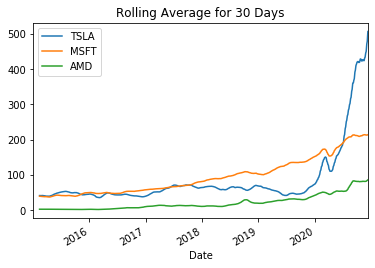

In [11]:
# Find Rolling Mean
rollingmean = portfolio_close.rolling(window=30).mean()

# Plot Rolling Mean
rollingmeanplot = rollingmean.plot(title='Rolling Average for 30 Days');

# Save Figure
rollingmeanplot.figure.savefig(f"Images/rollingmeansplot.png", bbox_inches='tight')

## Taking the 30 day rolling average smoothes the graphs and makes it easier to see overall trends. Based on the rolling average, would you change your previous answers?

## The Standard Deviation (STD) is a measure of the volatility of a stock.  It can be calculated as a single statistic for an entire dataset.  The higher the STD, the more volatile a stock.

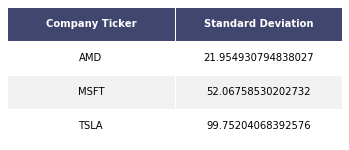

In [21]:
# Calculate STD
overallstd = portfolio_close.std().sort_values()

overallstd = pd.DataFrame(overallstd)

overallstd = overallstd.reset_index()

overallstd.columns = ["Company Ticker", "Standard Deviation"]

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=10,
                     header_color='#40466E', row_colors=['#F1F1F2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([3.0, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, cellLoc='center', **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax
fig,ax = render_mpl_table(overallstd, header_columns=0, col_width=2.0)
fig.savefig("Images/std.png")

## Based on this statistic, what can you say about the volatility of your stocks?

## The Rolling STD looks at changes in volatility over time.

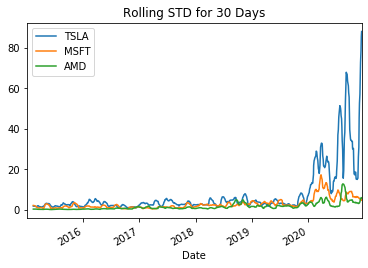

In [13]:
# Find Rolling STD for 30 Days
rollingstd = portfolio_close.rolling(window=30).std()

# Plot Rolling STD
rollingstdplot = rollingstd.plot(title='Rolling STD for 30 Days');

# Save Figure
rollingstdplot.figure.savefig(f"Images/rollingstdplot.png", bbox_inches='tight')

## Based on this plot, how would you describe the volatility of your stocks?  Are some more volatile than others?  Do they have periods of higher and lower volatility?  What could influence these?

# Performance Analysis

To check a stock's performance we look at the historical prices in time. However; in order to understand its performance, there should be a comparison with other company stocks or general market trends. Prices can not be used to compare different companies; therefore, returns in percentage are calculated to have a meaningful comparison and performance analysis. 

### *Daily Return* 
Looking at the daily returns of stocks helps to see daily performance comparisons. 

In [14]:
# Function to Find Company Name from Ticker
def get_symbol(symbol):
    
    # URL to Yahoo Stocks
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)
    
    # Get JSON Request
    result = requests.get(url).json()
    
    # Save Result for Each Company
    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']

This graph shows us daily percent changes of Tesla, Inc..
This graph shows us daily percent changes of Microsoft Corporation.
This graph shows us daily percent changes of Advanced Micro Devices, Inc..


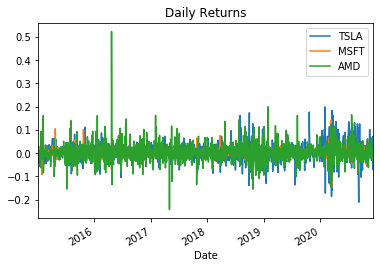

In [15]:
# Print Company Names
for x in range(len(stock_list)):
    print(f"This graph shows us daily percent changes of {get_symbol(stock_list[x])}.")

# Find Daily Returns
stock_performance = portfolio_close.pct_change().dropna()

# Plot Daily Returns
stock_performance_plt = stock_performance.plot.line(title = "Daily Returns")

# Save Figure
stock_performance_plt.figure.savefig(f"Images/daily_returns.png", bbox_inches='tight')

# Show Plot
stock_performance_plt;

### *Cumulative Return* 
Looking at the cumulative return of stocks helps to see general performance comparison in a timespan. 

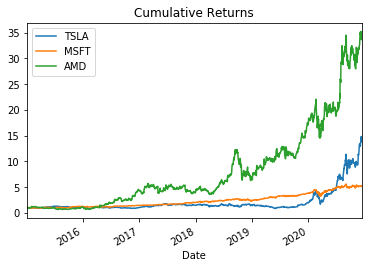

In [16]:
# Find Cumulative Return
stock_performance_cum = (1+stock_performance).cumprod()

# Plot Cumulative Return
stock_performance_cum_plt = stock_performance_cum.plot.line(title="Cumulative Returns")

# Save Figure
stock_performance_cum_plt.figure.savefig(f"Images/cumulative_returns.png", bbox_inches='tight')

# Show Plot
stock_performance_cum_plt;

# Exponentially Weighted Moving Average (EWMA)

### Definition: A view of the average price (open, close, mean) of a stock that gives more weight to the more recent values of the asset.  

### Purpose: The EWMA of a stock can be used as a condfidence indiacator, meaning that a strong but declining stock should have a hard time moving below the EWMA.EWMA can help you to determine what actions to take with an asset depending on its relative position to the close price. 

In [22]:
df = portfolio_close

def ewmas(df, win, keepSource):

    df_temp = df.copy()

    #change names of columns
    columnNames = list(df_temp.columns.values).copy()
    removeNames = columnNames.copy()

    i = 0
    for col in columnNames:

        # Make new names for ewmas
        ewmaName = columnNames[i] + '_EWMA' + str()   

        # Add ewmas
        df_temp[ewmaName] = df[columnNames[i]].ewm(halflife=21).std()

        i = i + 1

    # Remove estimates with insufficient window length
    df_temp = df_temp.iloc[win:]

    # Remove or keep source data
    if keepSource == False:
        df_temp = df_temp.drop(removeNames,1)

    return df_temp

df_new = ewmas(df = df, win = 2, keepSource = True)
df_new.tail()

,TSLA,MSFT,AMD,TSLA_EWMA,MSFT_EWMA,AMD_EWMA
Date,,,,,,
2020-12-07,641.760010,214.289993,94.070000,96.219436,7.654095,8.308281
2020-12-08,649.880005,216.009995,92.919998,100.642153,7.564571,8.366891
2020-12-09,604.479980,211.800003,89.830002,102.102427,7.440870,8.314607
2020-12-10,627.070007,210.520004,91.660004,104.321778,7.324020,8.309955
2020-12-11,609.989990,213.259995,91.650002,105.441921,7.207792,8.296805


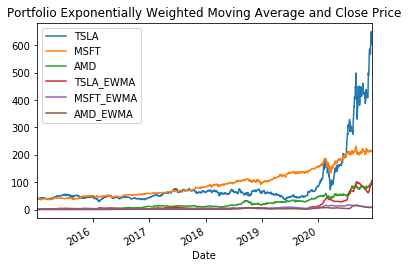

In [41]:
ewma_plot = df_new.plot(title='Portfolio Exponentially Weighted Moving Average and Close Price');

ewma_plot.figure.savefig(f"Images/ewma.png", bbox_inches='tight')

### Using Exponentially Weighted Moving Average with overlapping closing prices, what would be your action for the assets in the portfolio you created? 

# Risk Analysis

### Definition: Looking at individual assets, risk and return can be directly correlated. Often as risk increases the opportunity for a large return will also increase, but also a large loss. Looking at an entire portfolio a more risk adverse portfolio will be diverse and have stocks or assets that do not directly correlate with each other. 

### Purpose: Risk Analysis is a good tool to weigh the risk versus return for an entire portfolio or a single asset or security. 

In [26]:
#variables needed
#stocks = portfolio_returns
#weights
weights = np.full((1,len(portfolio_close.columns)), 1/len(portfolio_close.columns))[0].tolist()

#calculate the daily returns of our portfolio
portfolio_returns = portfolio_close.pct_change()

portfolio_returns = portfolio_returns.dropna().copy()

portfolio_returns.head(10)

,TSLA,MSFT,AMD
Date,,,
2015-01-05,-0.042041,-0.009196,-0.003745
2015-01-06,0.005664,-0.014677,-0.011278
2015-01-07,-0.001562,0.012705,-0.019011
2015-01-08,-0.001564,0.029418,0.011628
2015-01-09,-0.018802,-0.008405,0.007663
2015-01-12,-0.021533,-0.012503,0.000000
2015-01-13,0.010088,-0.005150,0.011407
2015-01-14,-0.056597,-0.008628,-0.011278
2015-01-15,-0.004255,-0.010444,-0.041825


In [27]:
#calculate the a average return for each stock
portfolio_returns_avg_rtn = portfolio_returns.mean()
portfolio_returns_avg_rtn

TSLA    0.002362
MSFT    0.001248
AMD     0.003149
dtype: float64

In [42]:
allocated_daily_returns = (weights * portfolio_returns_avg_rtn)

portfolio_return_pct = np.sum(allocated_daily_returns)
print(f"""

The average daily percent return of the portfolio is {round(portfolio_return_pct*100,2)}%""")



The average daily percent return of the portfolio is 0.23%


In [29]:
#add daily returns to our dataframe 
portfolio_returns['portfolio_daily_returns'] = portfolio_returns.dot(weights)
portfolio_returns.head()

,TSLA,MSFT,AMD,portfolio_daily_returns
Date,,,,
2015-01-05,-0.042041,-0.009196,-0.003745,-0.018327
2015-01-06,0.005664,-0.014677,-0.011278,-0.006764
2015-01-07,-0.001562,0.012705,-0.019011,-0.002623
2015-01-08,-0.001564,0.029418,0.011628,0.013161
2015-01-09,-0.018802,-0.008405,0.007663,-0.006515


In [30]:
#calculate cumulative returns
Cumulative_returns_daily = (1+portfolio_returns).cumprod()
Cumulative_returns_daily.head()

,TSLA,MSFT,AMD,portfolio_daily_returns
Date,,,,
2015-01-05,0.957959,0.990804,0.996255,0.981673
2015-01-06,0.963385,0.976262,0.985019,0.975033
2015-01-07,0.961880,0.988666,0.966292,0.972476
2015-01-08,0.960376,1.017750,0.977528,0.985274
2015-01-09,0.942319,1.009196,0.985019,0.978855


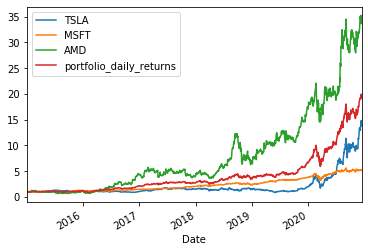

In [31]:
#plot cumulative returns for portfolio and individual stocks
Cumulative_returns_daily.plot();

In [43]:
returns_sum = Cumulative_returns_daily['portfolio_daily_returns'].sum()

In [45]:
#calculate the covariance of the portfolio for risk analysis
#a positive covariance means the assets move in the same direction
#a negative covariance means the assets move in different directions and ultimately lowers your risk through diversivication

covariance_portfolio = portfolio_returns.iloc[:,:-1]
covariance_portfolio = (covariance_portfolio.cov())*252

In [46]:
#calculate variance and risk
portfolio_variance = np.dot(weights,np.dot(covariance_portfolio, weights))

#standard deviation (risk of portfolio)
portfolio_risk = np.sqrt(portfolio_variance)

In [47]:
print(f"""This portfolio has a return of {round(returns_sum - 100,2)}% 
and a risk of {round(portfolio_risk *100, 2)}%.""")

This portfolio has a return of 6033.59% 
and a risk of 37.0%.


### Knowing the risk and return of this portfolio, how would you optimize it or change it to reduce risk or increase return? 